In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
# k-means clustering 구현을 위한 sklearn 패키지 내 함수 불러오기
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
# 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 데이터 불러오기
iris = datasets.load_iris()

# 인풋, 아웃풋을 X, y변수로 할당
X = iris.data
y = iris.target

# 대략적인 샘플 수, 피쳐 수를 확인
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
# 분석에 사용할 첫 두개 피쳐만을 선택
X = X[:, :2]

K-mean clustering은 거리의 개념을 사용하기 때문에, 피쳐간 변동의 스케일이 다른 경우 문제가 생길 수 있다.  
예를 들어 하나 변수는 0~1범위에서 변동이 있는데 다른 변수는 수백 ~ 수천 단위의 범위로 변동이 있을 경우 전자의 변수가 고려가 되지 않을 것이다.  
따라서 min-max scaling방식의 표준화 전처리를 적용하여 보겟다.

In [4]:
# min-max scaling을 이용해 정규화하기
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 초기 군집 중심을 설정하기
1. 군집 수 k 설정
2. 기존 데이터중 k개를 랜덤으로 골라 초기 군집의 중심 설정\
3. 설정된 결과를 시각화

In [5]:
# 군집화를 수행할 군집 수
n_cluster = 3

# 기존 데이터 중 랜덤으로 선택해 초기 군집의 중심을 설정
init_idx = np.random.randint(X.shape[0], size=n_cluster)
init_data = X[init_idx, : ]

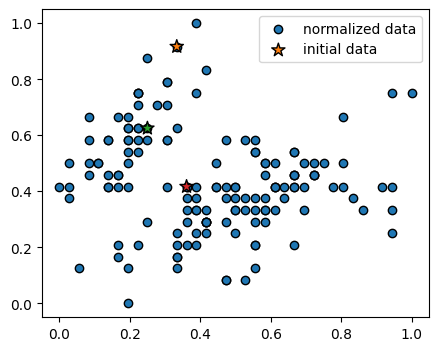

In [6]:
# 정규화된 데이터 시각화
plt.figure(figsize = (5,4))
plt.scatter(X[:,0], X[:,1], c='C0', label='normalized data', edgecolors="k")   
#scatter은 산점도를 생성하는 함수이다.

# 초기 군집 중심을 별표로 시각화
plt.scatter(init_data[:,0],init_data[:,1],edgecolors="k",c=['C1','C2','C3'], label='initial data', marker='*',s=100)
plt.legend()
plt.show()

In [7]:
# 군집화 초기화
iter = 0

# 군집의 중심을을 위에서 설정한 초기 데이터로 정의 (mu_k)
centroid = init_data

# step 1: 각 데이터 포인트에서 각 군집 중심까지의 거리를 계산 후, 가장 가까운 군집중심을 가진 군집으로 할당 (r_ik)
diff = X.reshape(-1,1,2) - centroid     # reshape함수 = (-1,1,2)의 행렬로 X 변경
distances = np.linalg.norm(diff, 2, axis=-1)        # 유클리드 거리계산, axis=-1은 마지막 차원을 기준으로 계산하여 각 군집 중심에 대한 거리 값을 얻는다.
clusters = np.argmin(distances, axis=-1) # 주어진 배열에서 최소값을 가지는 인덱스를 반환, 마지막 차원을 기준으로 최소값의 인덱스를 찾는다.

In [10]:
# 군집화 결과 시각화 도움 함수
def plot_cluster(X, clusters, centroid, iter=0):
    plt.figure(figsize=(5,4))

    # 군집화된 데이터
    plt.scatter(X[:,0],X[:,1],c=clusters, cmap=plt.cm.Set1, edgecolors="k", label='data')

    # 군집의 중심 시각화
    plt.scatter(centroid[:,0],centroid[:,1],marker='*',s=100,edgecolors="k",c=['C1','C2','C3'],label='centroid')
    plt.title(f'Clustering results (iter={iter})')

    plt.legend()
    plt.show()

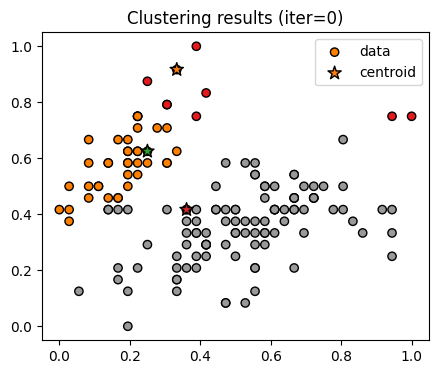

In [11]:
# 군집화 결과 시각화
plot_cluster(X, clusters, centroid, iter)

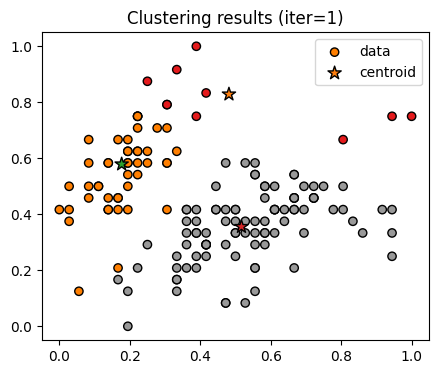

In [13]:
iter += 1 # 다음 iteration

# step2: 군집의 중심을 각 군집에 할당된 데이터들의 평균으로 정의 (mu_k)
clusters = np.array(clusters)
centroid = np.array([
    X[clusters==0,:].mean(axis=0),
    X[clusters==1,:].mean(axis=0),
    X[clusters==2,:].mean(axis=0),
])

# step1: 각 데이터 포인트에서 각 군집 중심가지의 거리를 계산 후, 가장 가까운 군집중심을 가진 군집으로 할당(r_ik)
diff = X.reshape(-1,1,2) - centroid
distances = np.linalg.norm(diff, 2, axis=-1)
clusters = np.argmin(distances, axis=-1)

# 결과 시각화
plot_cluster(X,clusters,centroid,iter)

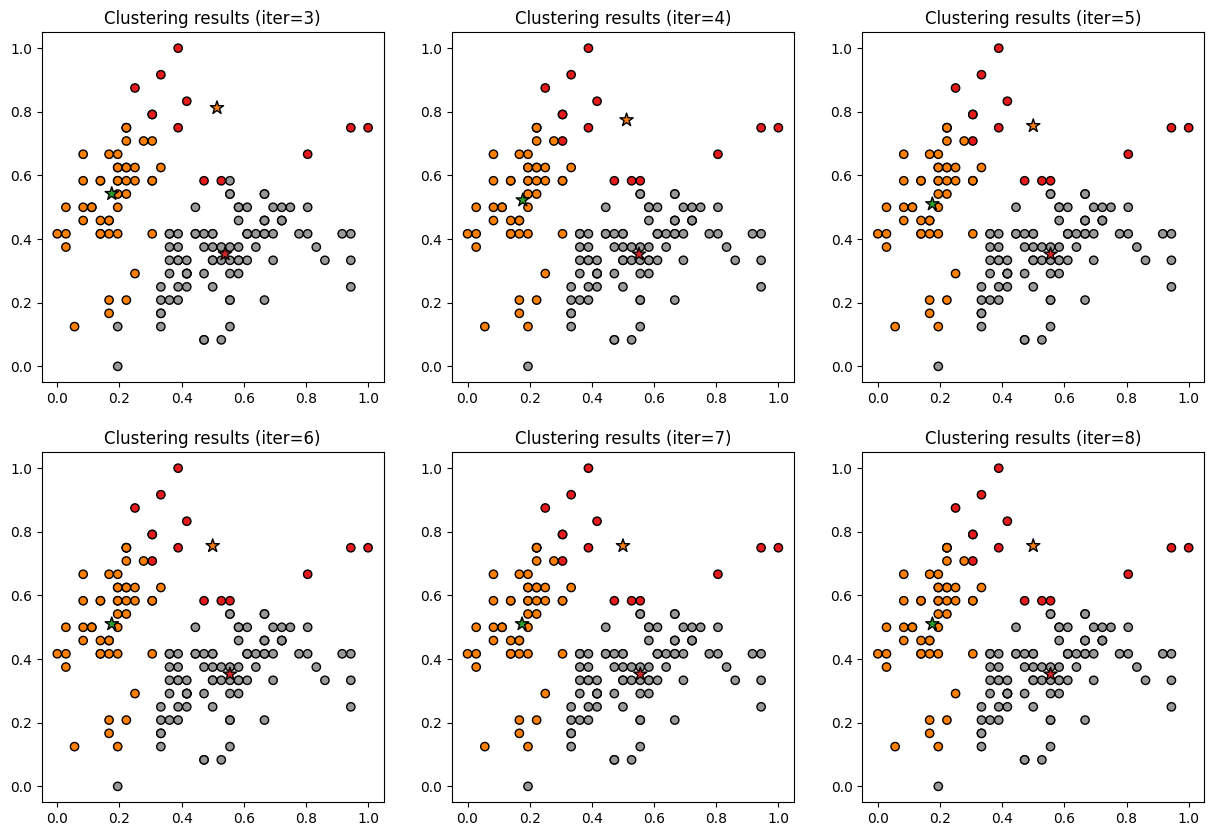

In [14]:
# step3: step2 반복: iteration 3~11
fig = plt.figure(figsize=(15, 10))
for iter in range(6):
    # 군집의 중심을 각 군집에 할당된 데이터들의 평균으로 정의 (mu_k)
    clusters = np.array(clusters)
    centroid = np.array([
        X[clusters == 0, :].mean(axis=0),
        X[clusters == 1, :].mean(axis=0),
        X[clusters == 2, :].mean(axis=0),
    ])

    # step 1 반복: 각 데이터 포인트와 군집의 중심과의 거리를 계산하여 가장 가까운 군집으로 할당 (r_ik)
    diff = X.reshape(-1, 1, 2) - centroid
    distances = np.linalg.norm(diff, 2, axis=-1)
    clusters = np.argmin(distances, axis=-1)

    # 결과 시각화
    ax = fig.add_subplot(2, 3, iter + 1)
    # 군집화된 데이터 시각화
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap=plt.cm.Set1, edgecolor="k")
    # 군집의 중심 시각화
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=100, edgecolor="k", c=['C1','C2','C3'], label='centroid')

    ax.set_title(f'Clustering results (iter={iter + 3})')

plt.show()

In [15]:
def k_means_clustering(data, n_cluster, num_iter):
    '''
    k-means clustering 구현 및 결과값 저장
    '''
    result = {}
    # 반복횟수만큼 반복
    for iter in range(0, num_iter + 1):
        # 군집의 중심 정의
        if iter == 0:
            # 초기화: 첫번째 iteration에서는 군집의 중심을 위에서 설정한 초기 데이터로 정의 (mu_k)
            np.random.seed(0)
            init_idx = np.random.randint(data.shape[0], size=n_cluster)
            centroid = data[init_idx, :]
        else:
            # step2: 군집의 중심을 각 군집에 할당된 데이터들의 평균으로 정의 (mu_k)
            clusters = np.array(clusters)
            centroid = np.array([
                data[clusters == 0, :].mean(axis=0),
                data[clusters == 1, :].mean(axis=0),
                data[clusters == 2, :].mean(axis=0),
            ])

        # step 1: 각 데이터 포인트와 군집의 중심과의 거리를 계산하여 가장 가까운 군집으로 할당 (r_ik)
        diff = X.reshape(-1, 1, 2) - centroid
        distances = np.linalg.norm(diff, 2, axis=-1)
        clusters = np.argmin(distances, axis=-1)

        # clustering 결과를 dictionary에 iteration index 별로 저장
        result[iter] = {
            'clusters': clusters,
            'centroid': centroid,
        }
    return result

In [16]:
# iris 데이터 X에 대해 k-means clustering 수행
result = k_means_clustering(X, n_cluster=3, num_iter=10)

In [17]:
# plotly 버전
def plotly_results(data, result):

    # 데이터 전처리
    df = pd.DataFrame()
    for idx, res in result.items():

        # 각 데이터의 군집 인덱스
        cluster = pd.DataFrame(data, columns=['X','Y'])
        cluster['cluster_idx'] = res['clusters']
        cluster['iter'] = idx
        cluster['label'] = 'data'
        cluster['label_size'] = 0.1
        df = pd.concat([df, cluster], axis=0)

        # 군집 중심 데이터
        centroid = pd.DataFrame(res['centroid'], columns=['X','Y'])
        centroid.reset_index(inplace=True)
        centroid.columns = ['cluster_idx']+list(centroid.columns[1:])
        centroid['iter'] = idx
        centroid['label'] = 'cluster_centroid'
        centroid['label_size'] = 1
        df = pd.concat([df, centroid], axis=0)

    # 애니메이션 시각화
    fig = px.scatter(df, x="X", y="Y", animation_frame="iter", color="cluster_idx", size='label_size', symbol='label', width=1000, height=800, symbol_sequence= ['circle', 'star'])
    fig.update_coloraxes(showscale=False)
    fig.show()

plotly_results(X, result)

In [18]:
# k-means clustering 수행하기
kmeans_clustering = KMeans(n_clusters=n_cluster, n_init="auto")
kmeans_clustering.fit(X)

# k-means clustering 에 의해 정의된 군집(cluster)과 군집의 중심(centroid)
clusters = kmeans_clustering.labels_
centroid = kmeans_clustering.cluster_centers_

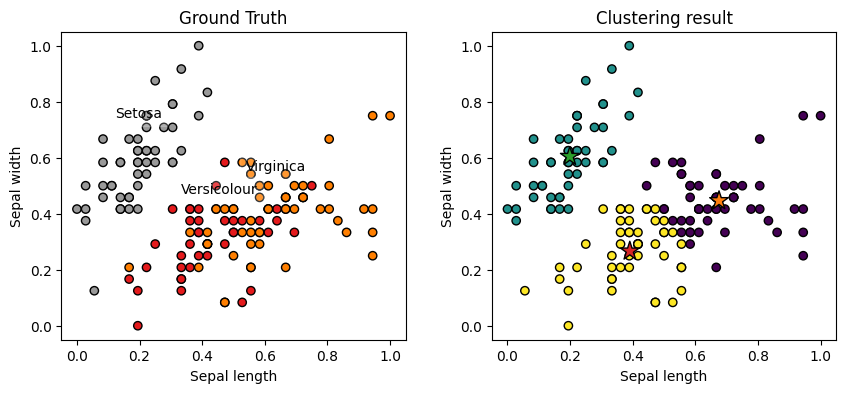

In [19]:
# 시각화
fig = plt.figure(figsize=(10, 4))

# ground truth 시각화
ax = fig.add_subplot(1, 2, 1)
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 0.15,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [2, 0, 1]).astype(float)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)

ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title("Ground Truth")

# clustering 결과 시각화
ax = fig.add_subplot(1, 2, 2)
# 군집화된 데이터 시각화
ax.scatter(X[:, 0], X[:, 1], c=np.array(clusters).astype(float), edgecolor="k")
# 군집의 중심 시각화
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, edgecolor="k", c=['C1','C2','C3'], label='centroid')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_title("Clustering result")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [20]:
# 재현성을 위한 랜덤시드 설정
np.random.seed(123)

# 실제 데이터의 군집 수와 k-means에서 지정할 군집의 수
n_centers = 5
n_clusters = 3

# 데이터 생성
X, Y = datasets.make_blobs(n_features=2, centers=n_centers)

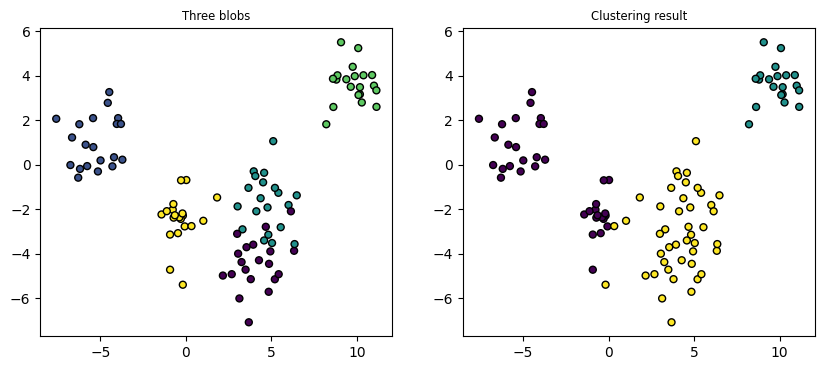

In [21]:
# 인풋 데이터와 라벨 시각화
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Three blobs", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

# k-means 군집화 수행
kmeans_clustering = KMeans(n_clusters=n_clusters, n_init="auto")
kmeans_clustering.fit(X)
clusters = kmeans_clustering.labels_

# 군집화 결과 시각화
plt.subplot(122)
plt.title('Clustering result', fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker="o", c=clusters, s=25, edgecolor="k")

plt.show()

In [22]:
# 군집수(n_cluster)를 변화시켜가며 k-means clustering 수행
results = []
for n in range(2, 10):
    kmeans_clustering = KMeans(n_clusters=n, n_init="auto")
    kmeans_clustering.fit(X)
    results.append(kmeans_clustering.inertia_)  # inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

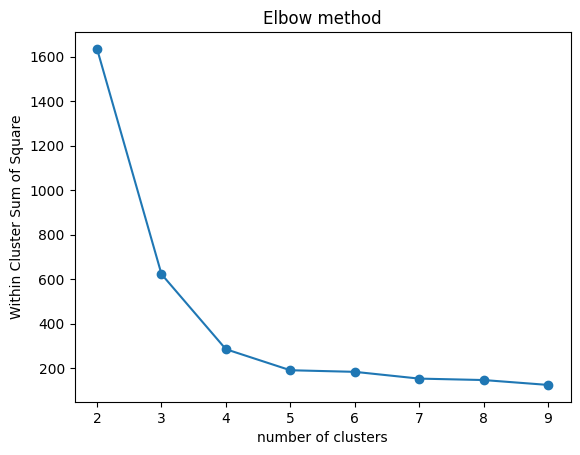

In [23]:
# 군집수(n_cluster)를 변화시켜가며 k-means clustering 을 수행한 결과의 거리 시각화
plt.plot([*range(2, 10)], results, '-o')
plt.xlabel('number of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow method')
plt.show()